### Predicting Heart Disease using ML
<img src="../resources/supervised-projects-6-step-ml-framework-tools-highlight.png" width=500/>

#### 1. Problem Definition
> Given clinical parameter about a patient, can we predict wheter or not they have heart disease?

#### 2. Data
> The original data came from the Cleverland data from the UCI Machine Learning Repository. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

#### 3. Evaluation
> If we reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll persue the project

#### 4. Features
> This is where you'll get different information about each of the features in your data

#### 5. Modelling

#### 6. Experimentation




### Import tools

In [3]:
# Import tools

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plot inside notebook
%matplotlib inline

# Models from Scikit-learn
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# https://matlabbkk.medium.com/%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F-roc-curve-%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%9A%E0%B8%AD%E0%B8%81-performance-%E0%B8%84%E0%B8%A7%E0%B8%B2%E0%B8%A1%E0%B9%81%E0%B8%A1%E0%B9%88%E0%B8%99%E0%B8%A2%E0%B8%B3%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A3-prediction-500c7e9f7073#:~:text=ROC%20CURVE%20%E0%B8%A1%E0%B8%B5%E0%B8%A5%E0%B8%B1%E0%B8%81%E0%B8%A9%E0%B8%93%E0%B8%B0%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F,%E0%B8%84%E0%B9%88%E0%B8%B2%E0%B8%AB%E0%B8%99%E0%B8%B6%E0%B9%88%E0%B8%87%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B9%83%E0%B8%8A%E0%B9%89%E0%B8%A7%E0%B8%B1%E0%B8%94
from sklearn.metrics import RocCurveDisplay

### Load data

In [4]:
dtf_heartdis = pd.read_csv("../resources/heart-disease.csv")
# Row and col
dtf_heartdis.shape

(303, 14)

In [5]:
dtf_heartdis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Data Exploration (explore data analysis or EDA)

- [EDA](https://chetnetisrisaan.medium.com/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%A7%E0%B8%B4%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B2%E0%B8%B0%E0%B8%AB%E0%B9%8C%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B9%80%E0%B8%8A%E0%B8%B4%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%95%E0%B8%A3%E0%B8%A7%E0%B8%88%E0%B8%AA%E0%B8%AD%E0%B8%9A-exploratory-data-analysis-%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%87%E0%B8%A1%E0%B8%B7%E0%B8%AD%E0%B9%83%E0%B8%AB%E0%B8%A1%E0%B9%88%E0%B8%82%E0%B8%AD%E0%B8%87-%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%A7%E0%B8%B4%E0%B8%97%E0%B8%A2%E0%B8%B2%E0%B8%A8%E0%B8%B2%E0%B8%AA%E0%B8%95%E0%B8%A3%E0%B9%8C%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5-cb31fff3843e) - การวิเคราะห์ข้อมูลเชิงการตรวจสอบ หรือ Exploratory Data Analysis (EDA) คือ การทำความเข้าใจชุดข้อมูล ซึ่ง เป็นขั้นตอนหนึ่งในกระบวนการวิเคราะห์ข้อมูลที่มีการใช้เทคนิคต่างๆ เพื่อทำความเข้าใจชุดข้อมูลที่ใช้งานได้ดีขึ้น จุดประสงค์ของการการวิเคราะห์ข้อมูลเชิงการตรวจสอบ คือ

1. เข้าใจตัวแปรและความสัมพันธ์ระหว่างตัวแปรได้ดีขึ้น เช่น ในแต่ละ Feaure เช่น ข้อมูลเป็นชนิดอะไร, ข้อมูลเป็นแบบต่อเนื่องหรือไม่ต่อเนื่อง,ช่วงของข้อมูลกว้างแค่ไหน, การกระจายของข้อมูลเป็นอย่างไร ตลอดจน การทำความเข้าใจความสัมพันธ์ และ แต่ละ Feature เชื่อมโยงกันอย่างไร, การเพิ่มข้อมูลเชิงลึกเกี่ยวกับชุดข้อมูลของคุณให้สูงสุดและลดข้อผิดพลาดที่อาจเกิดขึ้นในภายหลังในกระบวนการ

2. สำรวจและ ทำความสะอาดชุดข้อมูล เช่น การระบุค่าผิดปกติค่าที่ขาดหายไป, มีข้อมูลขาดหายไปเยอะแค่ไหน และ แยกตัวแปรที่สำคัญและทิ้งตัวแปรที่อาจจะทำให้การวิเคราะห์ผิดเพี้ยนไป

1. What qestion(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outlier and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [ ]:
# How many class there
dtf_heartdis["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

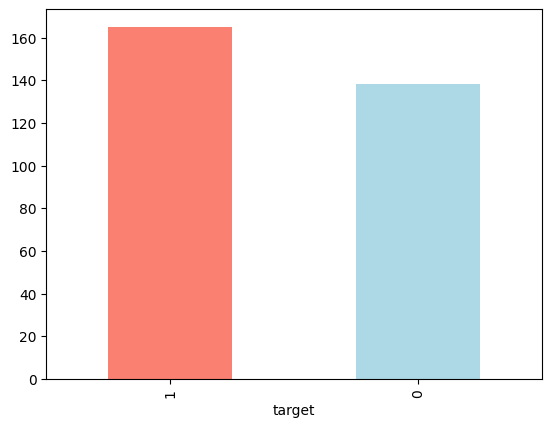

In [ ]:
dtf_heartdis["target"].value_counts().plot(kind= "bar", color = ["salmon", "lightblue"])

In [ ]:
dtf_heartdis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dtf_heartdis.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dtf_heartdis.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Finding Patterns

#### Heart Disease Frequency according to Sex

In [ ]:
pd.crosstab(dtf_heartdis["target"], dtf_heartdis["sex"])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

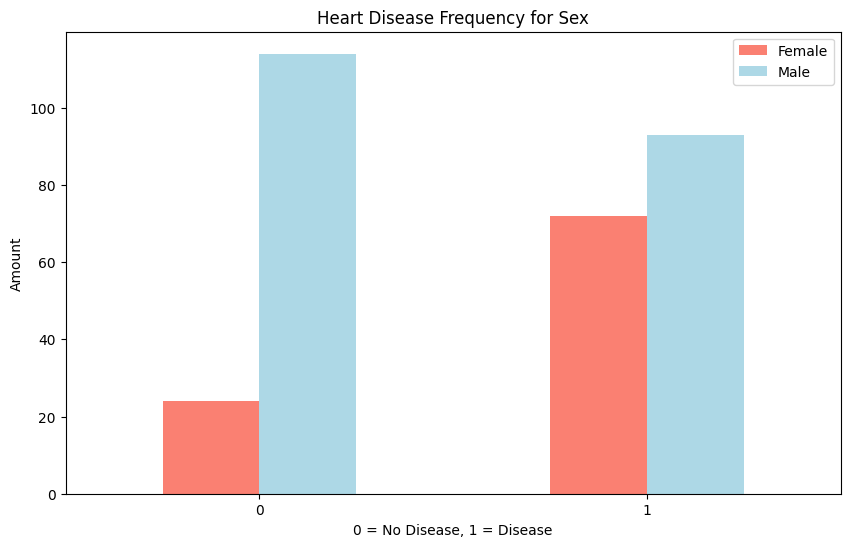

In [ ]:
pd.crosstab(dtf_heartdis["target"], dtf_heartdis["sex"]).plot(kind = "bar", figsize=(10,6), color = ["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)

#### Age vs Max Heart Rate for Heart Disease

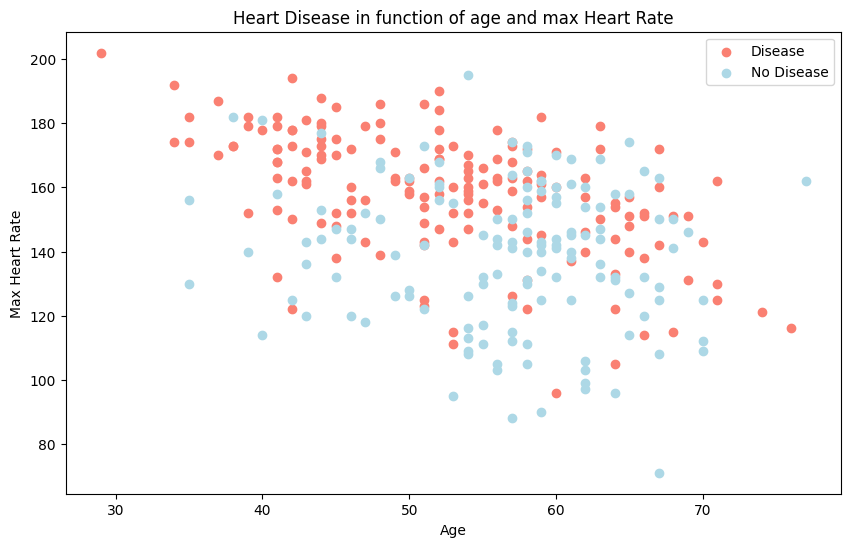

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(dtf_heartdis.age[dtf_heartdis["target"] == 1] , 
            dtf_heartdis.thalach[dtf_heartdis["target"] == 1], 
            c = "salmon")

# Scatter wth negative examples
plt.scatter(dtf_heartdis.age[dtf_heartdis["target"] == 0] , 
            dtf_heartdis.thalach[dtf_heartdis["target"] == 0], 
            c = "lightblue")

# Add info
plt.title("Heart Disease in function of age and max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

<Axes: ylabel='Frequency'>

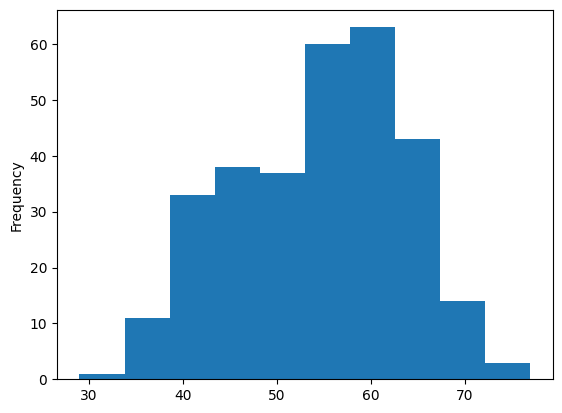

In [ ]:
# Check the distribution of age column is their any error
dtf_heartdis["age"].plot.hist()

#### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [ ]:
pd.crosstab(dtf_heartdis["cp"], dtf_heartdis["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

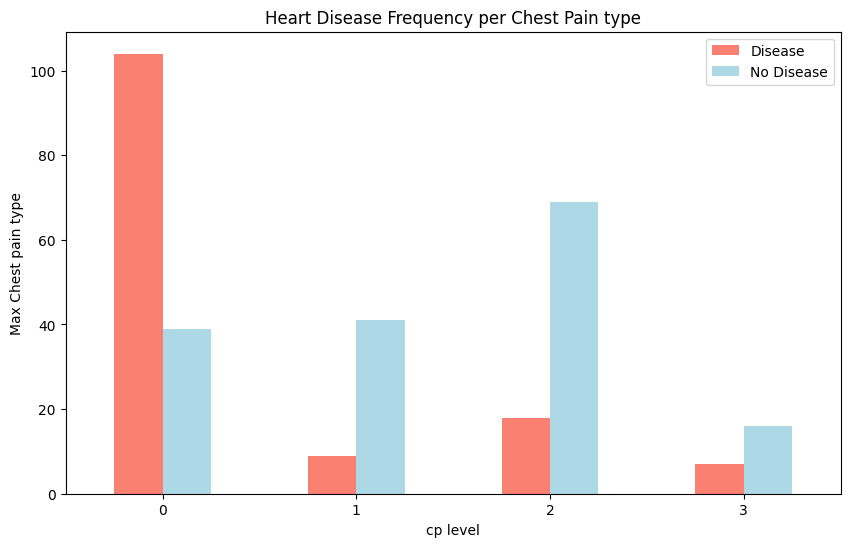

In [ ]:
# Make the crosstab more visual
pd.crosstab(dtf_heartdis.cp, dtf_heartdis.target).plot(kind = "bar",
                                                       figsize=(10,6),
                                                       color=["salmon", "lightblue"])
# Add some info
plt.title("Heart Disease Frequency per Chest Pain type")
plt.xlabel("cp level")
plt.ylabel("Max Chest pain type")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation = 0)

[สหสัมพันธ์ (Correlation)](https://datascihaeng.medium.com/basic-stats-for-data-science-05-ef7aa838b429)
- คือการหาความสัมพันธ์แบบเส้นตรงของตัวแปร 2 ตัวหรือมากกว่า โดยค่าที่ได้จะเรียกว่าค่า สัมประสิทธิ์สหสัมพันธ์ (Correlation Coefficient) ถ้าหากค่า Correlation Coefficient มีค่ามาก ก็ยิ่งมีความสัมพันธ์กันมาก โดยค่าทางด้านบวกคือมีความสัมพันธ์กันแบบแปรผัน (Positive Correlation) และค่าลบคือมีความสัมพันธ์กันแบบผกผัน (Negative Correlation)

<img src="../resources/Colleration scatter plot.jpg" width=800/>


In [ ]:
# Make Correlation Metrix
dtf_heartdis.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

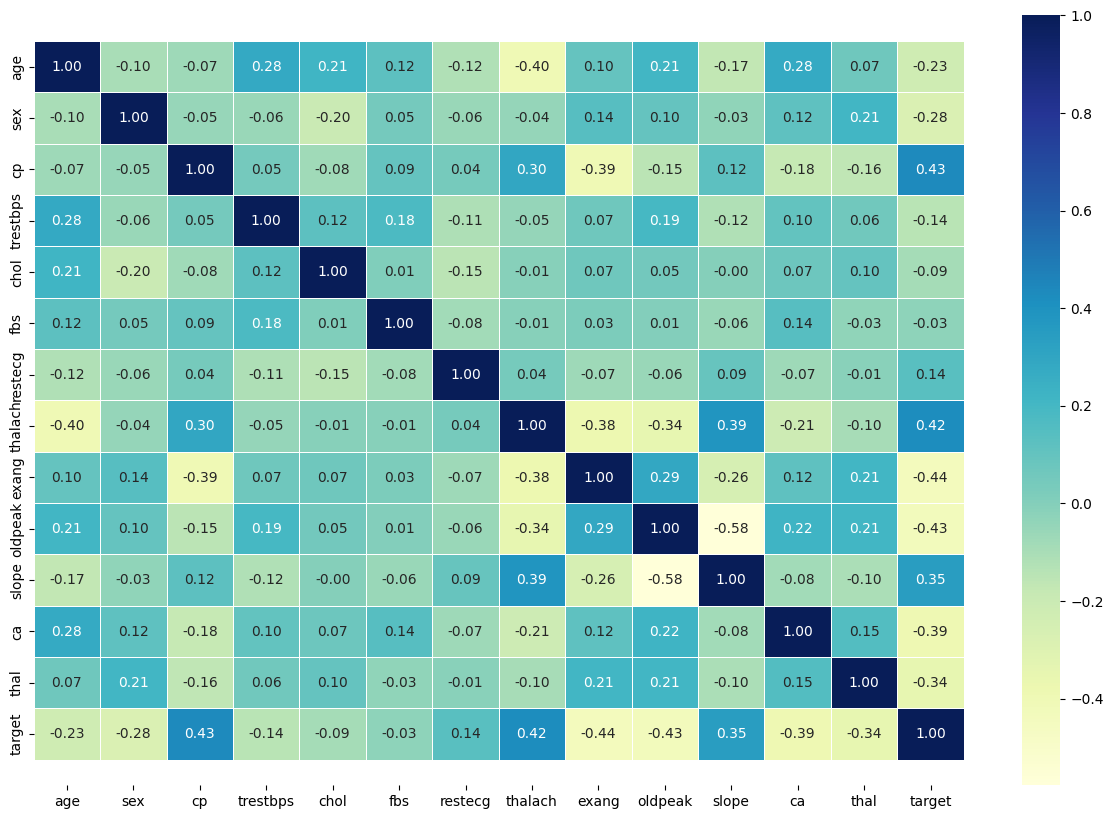

In [ ]:
# Make more visual
corr_metrix = dtf_heartdis.corr()

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_metrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Modelling

In [ ]:
dtf_heartdis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Split data into X and y
X = dtf_heartdis.drop("target", axis = 1)
y = dtf_heartdis["target"]

# Split data into train and test sets
np.random.seed(42)

# Split into train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Machine learning we will use :
1. Logistic Regression -> Note that normally we use Classifier to predict boolean, question is why we using Logistic 'Regression'
Ans : The logistic regression is implemented in LogisticRegression. Despite its name, it is implemented as a linear model for classification rather than regression in terms of the scikit-learn/ML nomenclature. https://en.wikipedia.org/wiki/Logistic_function

<img src="../resources/Logistic regression model.PNG" width=400/>

2. K-Nearest Neighbours Classifier

<img src="../resources/K-Nearest Neighbours Classifier.PNG" width=400/>

3. Random Forest Classifier

<img src="../resources/Random Forest Classifier.PNG" width=400/>

Create Model and score function

In [ ]:
# Create Dictionary for reused models
models = { 
          "LogisticRegression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "RandomForestClassifier" : RandomForestClassifier()
         }

def modelfitting_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model score
    model_score = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluating the model and append its score to the model_scores
        model_score[name] = model.score(X_test, y_test)
    return model_score

Calling function to receive actual variables

In [ ]:
models_score = modelfitting_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
models_score

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Model Comparison

In [ ]:
model_compare = pd.DataFrame(models_score, index = ["accuracy"])
model_compare

,LogisticRegression,KNN,RandomForestClassifier
accuracy,0.885246,0.688525,0.836066


<Axes: >

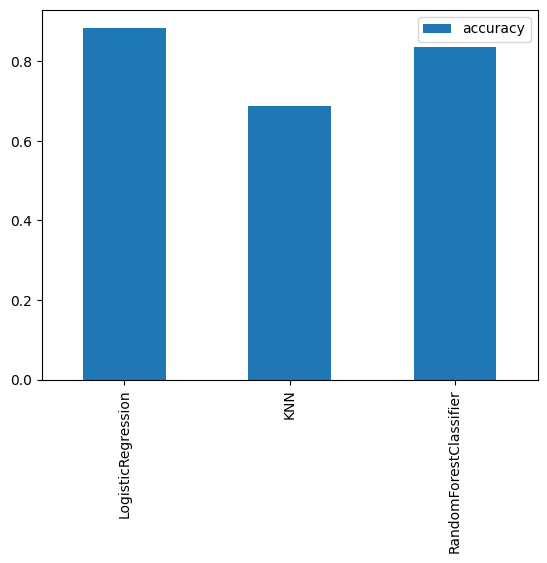

In [ ]:
# Visualizing graph by transpose the df that we create
model_compare.T.plot.bar()

### Tuning our model to be 95% accuracy !

- Classifiation and Regression metrics
<img src = "../resources/Classification and regression metrics evaluating.PNG" width = 500>
- Confusion matrix anatomy
<img src = "../resources/Confusion matrix anatomy.PNG" width = 500>
- Classification report anatomy
<img src = "../resources/Classification report anatomy.PNG" width = 500>

- List to look up

* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average. 
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.


#### Tuning by hands -> KNN
Why KNN? Well, because it can tune by n_neighbors by hands (Easy to visualize)
> n_neighbors int, default=5
- Number of neighbors to use by default for kneighbors queries.

##### Tuning n_neighbors find the number that most efficientcy

In [ ]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop throught different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
scores_df = pd.DataFrame({"train_score": train_scores, "test_score": test_scores},
                         index = range(1,21))
scores_df

,train_score,test_score
1,1.000000,0.622951
2,0.809917,0.639344
3,0.772727,0.655738
4,0.743802,0.672131
5,0.760331,0.688525
6,0.752066,0.721311
7,0.743802,0.704918
8,0.723140,0.688525
9,0.719008,0.688525
10,0.694215,0.704918


Maximum KNN score on the test data: 75.41%


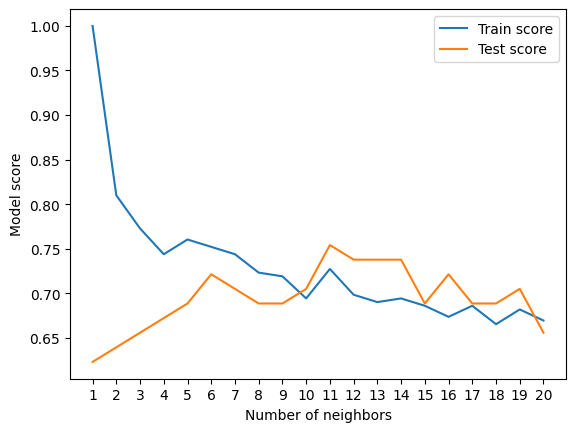

In [ ]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

#### Hyperparameter Tuning with RandomizedSearchCV -> LogisticRegression and RandomForestClassifier

- https://bigdata.go.th/big-data-101/machine-learning-model-hyperparameter-optimization/
- Model Parameters คือ พารามิเตอร์ที่ได้มาระหว่างขั้นตอนการเรียนรู้ข้อมูลของโมเดล (Model Training) เช่น ค่า Weights ที่ใช้ใน Neural Network หรือค่า Coefficients ที่ได้จากการทำ Linear Regression เป็นต้น
- Hyperparameters คือ พารามิเตอร์ต่าง ๆ ที่ผู้ใช้สามารถกำหนดเองได้ก่อนที่โมเดลจะทำการเรียนรู้ เช่น ค่า Learning Rate ที่ใช้ในการควบคุมว่าใน 1 Step ของการเรียนรู้จะปรับค่า Weights ของ Neural Network อย่างไร หรือค่า n_estimators ซึ่งกำหนดจำนวนต้นไม้สำหรับการสร้างโมเดล Random Forest เป็นต้น
- Grid Search หรือการค้นหาแบบกริด เป็นเทคนิคที่ใช้ในการหาค่า Hyperparameter ที่เข้าใจง่ายและตรงไปตรงมา ด้วยการลองใช้พารามิเตอร์ที่กำหนดไว้ล่วงหน้าทุกชุด และประเมินประสิทธิภาพหรือความแม่นยำของโมเดลแต่ละชุด จะเป็นการลองสร้างโมเดลจากค่าของ Hyperparameter ทุกชุด รูปแบบของการทำงานจะคล้ายกริด โดยค่าทั้งหมดจะอยู่ในรูปของเมทริกซ์ (Matrix) พารามิเตอร์แต่ละชุดจะถูกนำมาพิจารณาและสังเกตความถูกต้อง เมื่อชุดของ Hyperparameter ทั้งหมดได้รับการประเมินแล้ว โมเดลที่มีชุดพารามิเตอร์ที่ให้ความแม่นยำสูงสุดจะถือว่าดีที่สุด สำหรับตัวอย่างการเขียนโค้ดของ Grid Search เราจะเพิ่มการทำ Cross-Validation สำหรับการสร้างโมเดลเข้าไปด้วย โดยมีข้อแม้ว่าเราต้องกำหนด Search Space ที่เหมาะสม เพราะวิธีนี้จะทำการสร้างโมเดลโดยใช้ Hyperparameter ทุกชุดเพื่อหา ชุดของ Hyperparameter ที่ดีที่สุด แต่ข้อเสียที่เห็นได้ชัด คือ เวลาที่ใช้ในการสร้างโมเดลที่นาน
- Random Search คล้ายคลึงกับการทำ Grid Search แต่แทนที่จะลองใช้พารามิเตอร์ที่กำหนดไว้ล่วงหน้าในกริดทุกชุด RandomSearch จะทำการสุ่มเลือกค่าพารามิเตอร์จากกริดที่สร้างขึ้น ดังนั้นการทำ Random Search จะไม่รับประกันว่าเราจะได้โมเดลที่มีประสิทธิภาพที่สุดเหมือนกับ Grid Search แต่วิธีมีประสิทธิภาพสูงในการใช้งานจริงเนื่องจากใช้เวลาในการสร้างโมเดลที่น้อยมาก ในการเขียนโค้ดเพื่อทำ Random Search เราจะใช้ Library จาก Scikit-learn ที่เรียกว่า RandomizedSearchCV() โดยเราจะแบ่ง Training Set ของเป็น 4 Folds (cv = 4) และจะให้โมเดลทำการสุ่มค่า Hyperparameter ออกมา 80 ชุด (n_iter = 80) เพื่อหาชุดของค่าพารามิเตอร์ที่ดีที่สุด
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

sklearn.linear_model.LogisticRegression Hyperparamter
- C : float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
- solver : {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects: 
1. For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
2. For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
3. ‘liblinear’ is limited to one-versus-rest schemes.
4. ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.

Create Hyperparameter Grid

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# Create a hyperparamater grid for RandomForestClassifier
# It is highly recommended to use continuous distributions for continuous parameters.
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

##### Tuning LogisticRegression

In [ ]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegrassion
randomsearch_log_reg = RandomizedSearchCV(LogisticRegression(),
                                          param_distributions= log_reg_grid,
                                          cv=5,
                                          n_iter=20,
                                          verbose=True)

# Fit random hyperparameter search model
randomsearch_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
randomsearch_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

The result of tuning LogisticRegression is not far better, Seem for tuning more hyperparameter

In [ ]:
randomsearch_log_reg.score(X_test, y_test)

0.8852459016393442

##### Tuning RandomForestClassifier

In [ ]:
# Tuning RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
randomsearch_rf = RandomizedSearchCV(RandomForestClassifier(),
                                          param_distributions= rf_grid,
                                          cv=5,
                                          n_iter=20,
                                          verbose=True)
# Fit random hyperparameter search model
randomsearch_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
randomsearch_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
randomsearch_rf.score(X_test, y_test)

0.8688524590163934

Compare to old model_score, its better but not as good as LogisticRegression

In [ ]:
models_score

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

#### Hyperparameter Tuning with GridSearchCV -> LogisticRegression
Since LogisticRegression provided best score, so we continue to improve it

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegrssion
gridsearch_log_reg = GridSearchCV(LogisticRegression(),
                                  param_grid=log_reg_grid,
                                  cv=5,
                                  verbose=True)

# Fit grid hyperparameter search model
gridsearch_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
# Check best params
gridsearch_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# Evaluate the grid search LogisticRegression model
gridsearch_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
models_score

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

#### Evaluating our tuned ML model classifier, beyond accuracy
* ROC curve and AUC score - [`RocCurveDisplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) 
    * **Note:** This was previously `sklearn.metrics.plot_roc_curve()`, as of Scikit-Learn version 1.2+, it is `sklearn.metrics.RocCurveDisplay()`.
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

...using cross-validation where possible

#### ROC curve and AUC Scores
> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function `RocCurveDisplay` (previously called `plot_roc_curve` in Scikit-Learn versions > 1.2) which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

In [ ]:
# Make predictions with tuned model
y_preds = gridsearch_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

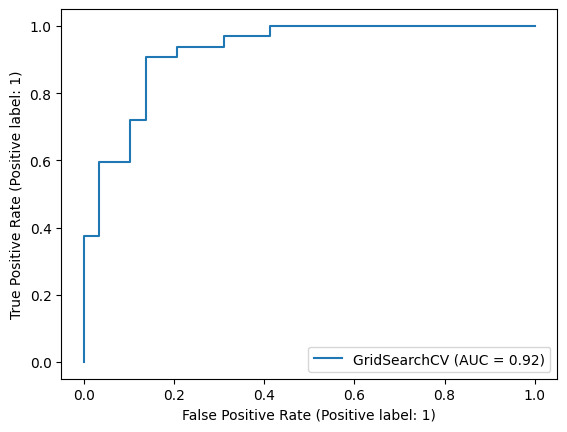

In [ ]:
# Plot ROC Curve and calculate
RocCurveDisplay.from_estimator(gridsearch_log_reg, X_test, y_test)

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

#### Confusion Matrix
- https://medium.com/@pagongatchalee/confusion-matrix-%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%87%E0%B8%A1%E0%B8%B7%E0%B8%AD%E0%B8%AA%E0%B8%B3%E0%B8%84%E0%B8%B1%E0%B8%8D%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%A1%E0%B8%B4%E0%B8%99%E0%B8%9C%E0%B8%A5%E0%B8%A5%E0%B8%B1%E0%B8%9E%E0%B8%98%E0%B9%8C%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%97%E0%B8%B3%E0%B8%99%E0%B8%B2%E0%B8%A2-%E0%B9%83%E0%B8%99machine-learning-fba6e3f9508c
  
> a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

True Positive (TP)= สิ่งที่ทำนาย ตรงกับสิ่งที่เกิดขึ้นจริง ในกรณี ทำนายว่าจริง และสิ่งที่เกิดขึ้น ก็คือ จริง

True Negative (TN)= สิ่งที่ทำนายตรงกับสิ่งที่เกิดขึ้น ในกรณี ทำนายว่า ไม่จริง และสิ่งที่เกิดขึ้น ก็คือ ไม่จริง

False Positive (FP)= สิ่งที่ทำนายไม่ตรงกับสิ่งที่เกิดขึ้น คือทำนายว่า จริง แต่สิ่งที่เกิดขึ้น คือ ไม่จริง

False Negative (FN)= สิ่งที่ทำนายไม่ตรงกับที่เกิดขึ้นจริง คือทำนายว่าไม่จริง แต่สิ่งที่เกิดขึ้น คือ จริง


In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


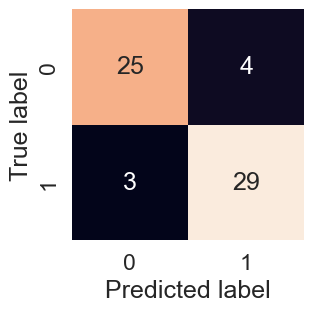

In [ ]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

#### Classification Report
- Accuracy (ความถูกต้องที่เราทายได้ตรงกับสิ่งที่เกิดขึ้นจริง)

Accuracy (ความถูกต้อง) = (TPs + TNs) / (TPs+TNs+FPs + FNs)

หรือกล่าวได้ว่า Accuracy = ผลรวมของตัวเลขบนเส้นทแยงมุมในตาราง Confusion Matrix / จำนวน observations ทั้งหมด โดย ความเป็นจริงแล้ว Confusion matrix ไม่จำเป็นต้องเป็นแบบ 2x2 หรือมีผลลัพธ์แค่ 2 แบบ เสมอไป โดยอาจเป็น 3x3,4x4, nxn ก็ได้ โดยวิธีการหาAccuracy ก็ใช้แบบเดิม คือ ผลรวมของตัวเลขบนเส้นทแยงมุมในตาราง Confusion Matrix / จำนวน observations ทั้งหมด

- Precision (ค่าความแม่นยำ) : เป็นการเปรียบเทียบ การทำนายที่ถูกต้องว่า จริง และก็เกิดขึ้นจริง (TP) กับ การทำนายว่า จริง แต่สิ่งที่เกิดขึ้น คือ ไม่จริง (FP)

Precision = TPs / (TPs + FPs)

- Recall (ความถูกต้องของการทำนายว่าจะเป็น “จริง” เทียบกับ จำนวนครั้งของเหตุการณ์ทั้งทำนาย และ เกิดขึ้น ว่า “เป็นจริง” )

Recall = TPs/(TPs+FNs)

- F1 score : F1-Score เป็นค่าเฉลี่ยแบบ harmonic mean ระหว่าง precision และ recall จุดประสงค์ของการสร้าง F1 ขึ้นมา คือ เพื่อเป็น single metric ที่วัดความสามารถของโมเดล

F1 = 2 x (Precision x Recall)/(Precision + Recall)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Calculate evaluation metrics using cross-validation
calculate precision, recall, f1 using cross validation 'cross_val_score()'

<img src = "../resources/sklearn-cross-validation.png" width = 500>

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
- scoring : str or callable, default=None
A str (see model evaluation documentation) or a scorer callable object / function with signature scorer(estimator, X, y) which should return only a single value.

In [ ]:
# Check best hyperparameters
gridsearch_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with best parameter
clf = LogisticRegression(C = 0.23357214690901212,
                         solver = "liblinear")
clf

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, 
                         cv = 5, 
                         scoring= "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [ ]:
# Cross-validated precision
cv_pcs = cross_val_score(clf, X, y, 
                         cv = 5, 
                         scoring= "precision")
cv_pcs

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [ ]:
cv_pcs = np.mean(cv_pcs)
cv_pcs

0.8215873015873015

In [ ]:
# Cross-validated recall
cv_rcl = cross_val_score(clf, X, y, 
                         cv = 5, 
                         scoring= "recall")
cv_rcl

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [ ]:
cv_rcl = np.mean(cv_rcl)
cv_rcl

0.9272727272727274

In [ ]:
# Cross-validated f1
cv_f1 = cross_val_score(clf, X, y, 
                         cv = 5, 
                         scoring= "f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [ ]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [ ]:
# Visualize cross-validated
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision" : cv_pcs,
                           "Recall" : cv_rcl,
                           "F1" : cv_f1},
                          index = [0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.847978,0.821587,0.927273,0.87054


<Axes: title={'center': 'Cross-validated classification metrics'}>

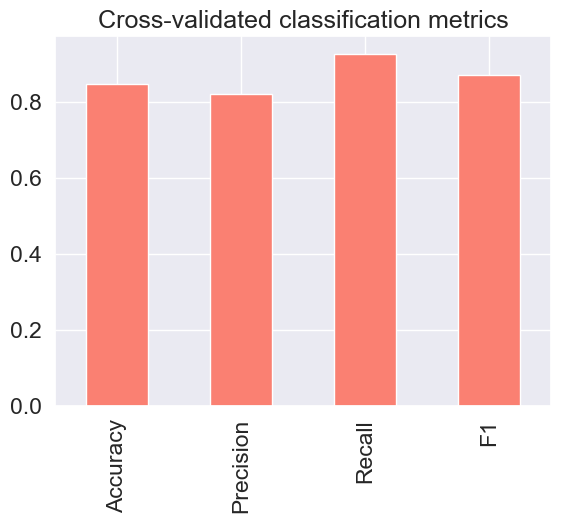

In [ ]:
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics",
                      legend = False,
                      color="salmon")

#### Feature Importance
- https://luangtatipsy.medium.com/%E0%B8%84%E0%B8%AD%E0%B8%A1%E0%B8%9E%E0%B8%B4%E0%B8%A7%E0%B9%80%E0%B8%95%E0%B8%AD%E0%B8%A3%E0%B9%8C%E0%B8%81%E0%B8%B3%E0%B8%A5%E0%B8%B1%E0%B8%87%E0%B8%84%E0%B8%B4%E0%B8%94%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3%E0%B8%AD%E0%B8%A2%E0%B8%B9%E0%B9%88-60aafa648b6f
- Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

- Finding feature importance is different for each ML model (RN focus on LinearRegression model)

- Feature importance เพื่อบอกว่า feature ไหนมีความสำคัญกับ model มากน้อยแค่ไหนเมื่อเทียบกับ feature อื่นๆ และที่สำคัญยังสามารถ apply หลักการดังกล่าวกับ model ไหนก็ได้หมด! (จะ 🌲random forrest หรือ 🤖neural net ก็ได้)
🔥การคิด feature importance มีขั้นตอน คือ
1) เทรน model กับข้อมูลปกติ และคำนวณค่า loss (เช่น MSE, MAE, Entropy) มาเป็น reference ไว้
2) สลับข้อมูลระหว่าง row ของ feature ที่จะคิดค่า importance และ เอาข้อมูลที่ถูกสลับนี้ไป predict ด้วย model ที่เทรนในข้อ 1 (💣สลับเพื่อทำลายความสัมพันธ์ระหว่าง feature และ target)
3) คำนวณค่า loss จากข้อ 2 เพื่อเปรียบเทียบว่าการทำลาย feature นั้นๆ ทำให้ค่า loss  มากขึ้นเท่าไหร่ และ บันทึกไว้
4) ทำแบบนี้กับทุก feature -> feature ไหนทำให้ค่า loss ขึ้นมามาก แปลว่ายิ่งสำคัญ!
😁เท่านี้เราก็แปลผลของ machine learning เพื่อการสื่อสารกับ user ได้ทางนึงแล้ว

<img src = "../resources/Feature Importance.jpg" width = 400>


In [ ]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C = 0.23357214690901212,
                         solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
# Check coefficient
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [ ]:
# Match coef's of featuring to columns
feature_dict = dict(zip(dtf_heartdis.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0036992207735222936,
 'sex': -0.9042409027676933,
 'cp': 0.6747282591013247,
 'trestbps': -0.011613401311995881,
 'chol': -0.001703643974904055,
 'fbs': 0.04787688089306608,
 'restecg': 0.3349019821325941,
 'thalach': 0.024729382907772574,
 'exang': -0.6312040609811942,
 'oldpeak': -0.5759095019287949,
 'slope': 0.4709514064291035,
 'ca': -0.6516534774104941,
 'thal': -0.6998420760932893}

<Axes: title={'center': 'Feature Importance'}>

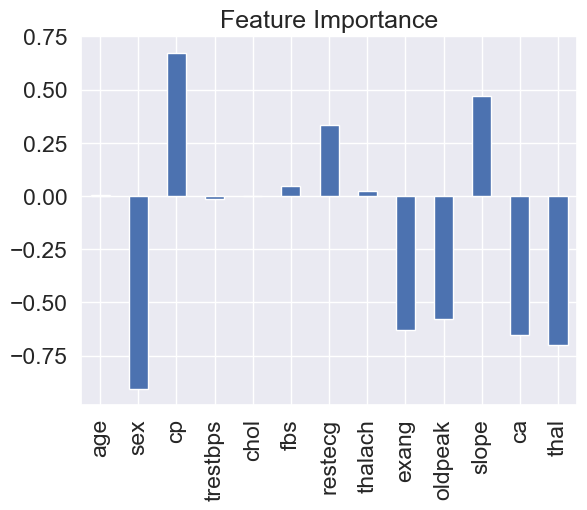

In [ ]:
# Visualize feature importance
feature_dtf = pd.DataFrame(feature_dict, index=[0])
feature_dtf.T.plot.bar(title = "Feature Importance",
                       legend = False)
# To understand this mfuq -> need to suggest corlleration metric